In [1]:
%load_ext autoreload

import os, sys
import networkx as nx

sys.path.insert(0, "../")
sys.path.insert(0, "/home/j/joppich/.local/lib/python3.11/site-packages/")

%autoreload 2
from mikg.kgraph import *
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from collections import defaultdict, Counter

import random
random.seed(42)

import pickle

In [2]:
kg = KGraph()

In [3]:
kg.load_kgraph_base("../data/", TFs=True, go=True, omnipath=True, opentargets=True, reactome=True, STRING=True, NPINTER=False, kegg=True)

/mnt/raidbio/extproj/projekte/regulatory_networks/scripts/../mikg/load_utils.py:371: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf["score"] = subdf[use_evidences].max(axis=1)/1000


HMS:0:00:11.303749 626,136 annotations READ: ../data/goa_human.gaf 
../data/go-basic.obo: fmt(1.2) rel(2023-01-01) 46,739 Terms


/mnt/raidbio/extproj/projekte/regulatory_networks/scripts/../mikg/load_utils.py:236: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  opd  = pd.read_csv(omnipathDB, sep="\t")


Removing 14481 singletons


In [4]:
kg.get_edge_between_type()

Counter({('gene', 'geneset'): 841157,
         ('gene', 'gene'): 344408,
         ('TF;gene', 'gene'): 95771,
         ('geneset', 'geneset'): 74634,
         ('TF;gene', 'geneset'): 74544,
         ('gene', 'disease'): 43297,
         ('disease', 'drug'): 35017,
         ('gene', 'TF;gene'): 19994,
         ('TF;gene', 'TF;gene'): 16120,
         ('gene', 'drug'): 7899,
         ('miRNA;ncRNA', 'gene'): 7848,
         ('TF;gene', 'disease'): 5105,
         ('TF;gene', 'miRNA;ncRNA'): 2099,
         ('miRNA;ncRNA', 'TF;gene'): 1808,
         ('gene', 'disease;geneset'): 1714,
         ('gene', 'miRNA;ncRNA'): 651,
         ('gene;lncRNA;ncRNA', 'geneset'): 444,
         ('TF;gene', 'drug'): 341,
         ('geneset', 'disease;geneset'): 200,
         ('TF;gene', 'disease;geneset'): 147,
         ('gene;lncRNA;ncRNA', 'gene'): 120,
         ('disease;geneset', 'geneset'): 95,
         ('lncRNA;ncRNA', 'gene'): 49,
         ('gene', 'gene;lncRNA;ncRNA'): 36,
         ('disease;geneset', '

In [5]:
kg.get_node_types()

Counter({'geneset': 55163,
         'gene': 41923,
         'disease': 7781,
         'drug': 3195,
         'TF;gene': 1629,
         'miRNA;ncRNA': 593,
         'disease;geneset': 61,
         'lncRNA;ncRNA': 36,
         'gene;lncRNA;ncRNA': 26})

In [6]:
kg.get_edge_types()

Counter({'part_of': 705930,
         'interacts': 434239,
         'relevant_in': 204493,
         'activates': 158594,
         'affected_by': 35051,
         'represses': 27058,
         'target_of': 8240})

In [7]:
kg.get_edge_types(field="source")

Counter({'kegg': 501176,
         'GeneOntology': 361812,
         'STRING': 293213,
         'omnipath': 195758,
         'reactome': 129820,
         'opentargets': 91826})

In [8]:
kg.get_edge_edge_types()

Counter({('gene', 'geneset', 'part_of'): 584177,
         ('gene', 'gene', 'interacts'): 299011,
         ('gene', 'geneset', 'relevant_in'): 184156,
         ('geneset', 'geneset', 'part_of'): 74634,
         ('gene', 'geneset', 'activates'): 72824,
         ('TF;gene', 'gene', 'interacts'): 61341,
         ('TF;gene', 'geneset', 'part_of'): 46417,
         ('gene', 'disease', 'interacts'): 43297,
         ('gene', 'gene', 'activates'): 35829,
         ('disease', 'drug', 'affected_by'): 35017,
         ('TF;gene', 'gene', 'activates'): 30050,
         ('TF;gene', 'geneset', 'relevant_in'): 18574,
         ('gene', 'TF;gene', 'interacts'): 14452,
         ('TF;gene', 'TF;gene', 'interacts'): 9704,
         ('gene', 'gene', 'represses'): 9568,
         ('TF;gene', 'geneset', 'activates'): 9553,
         ('gene', 'drug', 'target_of'): 7899,
         ('miRNA;ncRNA', 'gene', 'represses'): 7848,
         ('TF;gene', 'disease', 'interacts'): 5105,
         ('TF;gene', 'TF;gene', 'activates'

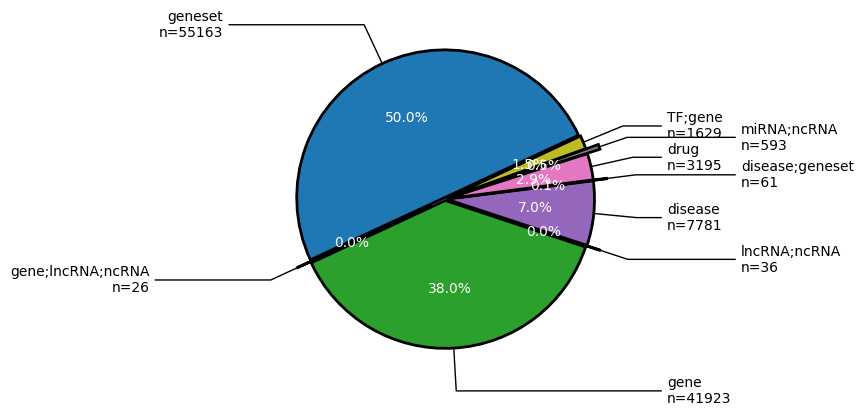

In [9]:
kg.plot_node_types()

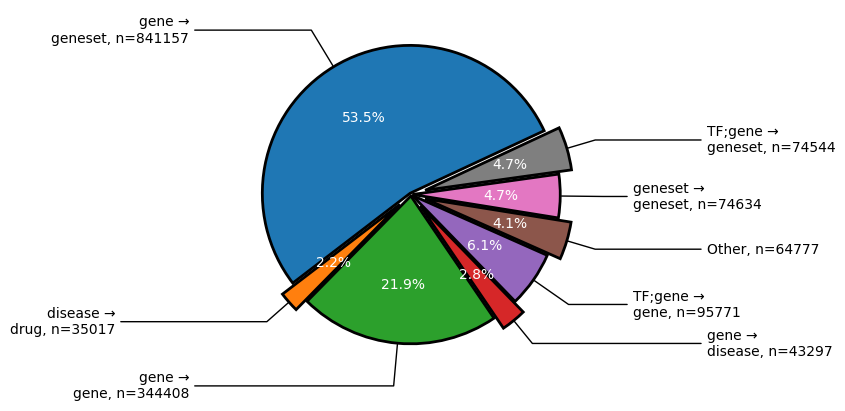

In [10]:
kg.plot_edge_between_types()

In [11]:
print(kg.kg)

DiGraph with 110407 nodes and 1573605 edges


In [12]:
for x in kg.kg.nodes:
    if "gene" in kg.kg.nodes[x]["type"] and "miRNA" in kg.kg.nodes[x]["type"]:
        print(x, kg.kg.nodes[x])

In [13]:
kg.save_kgraph("../data/initial_base_graph.out")

In [14]:
#
## Do some stats
#

In [15]:
kg = KGraph()
kg.load_kgraph("../data/initial_base_graph.out")

In [16]:
exprDF = pd.read_csv("../seq_data/expression_mean_df.tsv", sep="\t")
cmDF = exprDF[exprDF.group == "Cardiomyocyte"]
cmDF

,group,gene,min,percentile_25,median,percentile_75,max,mean,num,sd,group_cells,perc_expr
22891,Cardiomyocyte,A1BG,0.218642,0.439190,0.607427,0.831411,2.456248,0.709995,351,0.395967,64510,0.005441
22892,Cardiomyocyte,A1BG-AS1,0.214143,0.456117,0.643483,0.936906,3.038826,0.806031,461,0.518502,64510,0.007146
22893,Cardiomyocyte,A1CF,0.208636,0.422485,0.557386,0.773439,3.025672,0.637636,706,0.321588,64510,0.010944
22894,Cardiomyocyte,A2M,0.181245,0.651118,0.944811,1.398837,3.792171,1.075190,32973,0.547520,64510,0.511130
22895,Cardiomyocyte,A2M-AS1,0.185317,0.412732,0.539294,0.709554,2.699968,0.602207,3160,0.286947,64510,0.048985
...,...,...,...,...,...,...,...,...,...,...,...,...
50958,Cardiomyocyte,ZXDC,0.185317,0.610198,0.829333,1.097115,3.521134,0.891553,35191,0.378761,64510,0.545512
50959,Cardiomyocyte,ZYG11A,0.224826,0.414667,0.540848,0.712375,2.653949,0.637458,303,0.367307,64510,0.004697
50960,Cardiomyocyte,ZYG11B,0.187795,0.600248,0.812252,1.080384,3.494183,0.880513,33025,0.386580,64510,0.511936
50961,Cardiomyocyte,ZYX,0.193169,0.445595,0.595571,0.835346,3.001737,0.705213,5338,0.395080,64510,0.082747


In [17]:
exprDFs = {}

for group in exprDF.group.unique():
    exprDFs[group] = exprDF[exprDF.group == group].copy()

print([x for x in exprDFs])

['Adipocyte', 'Cardiomyocyte', 'Cycling cells', 'Endothelial', 'Fibroblast', 'Lymphoid', 'Mast', 'Myeloid', 'Neuronal', 'Pericyte', 'vSMCs']


In [18]:
kg.add_gene_expression(cmDF)

Measured Genes 28072
Found Genes 19730


In [19]:
mNS = MeanNetworkScorer()
mNS.score_nodes_from_properties(kg)
mNS.score(kg)

/mnt/raidbio/extproj/projekte/regulatory_networks/scripts/../mikg/kgraph.py:1403: RuntimeWarning: invalid value encountered in scalar divide
  edge_zscore = (edge_score-etype2mean[etype])/etype2std[etype]


In [20]:
def get_score(x):
    if "gene" in x.get("type", []):
        return x.get("score", 0)
    else:
        return x.get("score", 0)

In [21]:
kg.get_node_types()

Counter({'geneset': 55163,
         'gene': 23615,
         'gene;measured_expression': 18308,
         'disease': 7781,
         'drug': 3195,
         'TF;gene;measured_expression': 1405,
         'miRNA;ncRNA': 593,
         'TF;gene': 224,
         'disease;geneset': 61,
         'lncRNA;ncRNA': 36,
         'gene;lncRNA;measured_expression;ncRNA': 17,
         'gene;lncRNA;ncRNA': 9})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


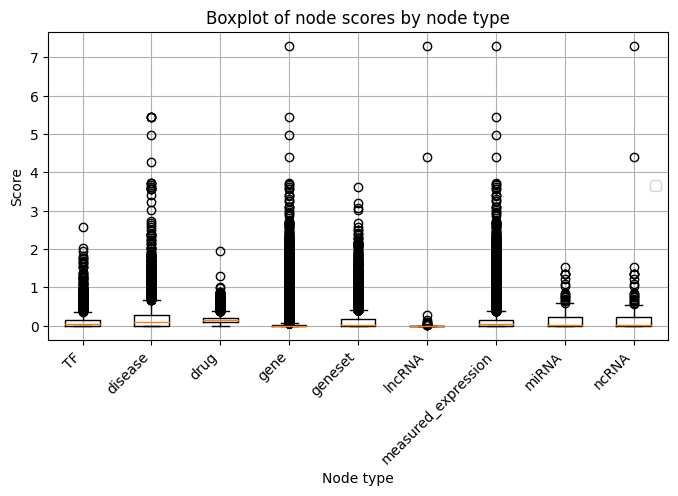

In [22]:
kg.plot_node_attribute_distribution(get_score)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


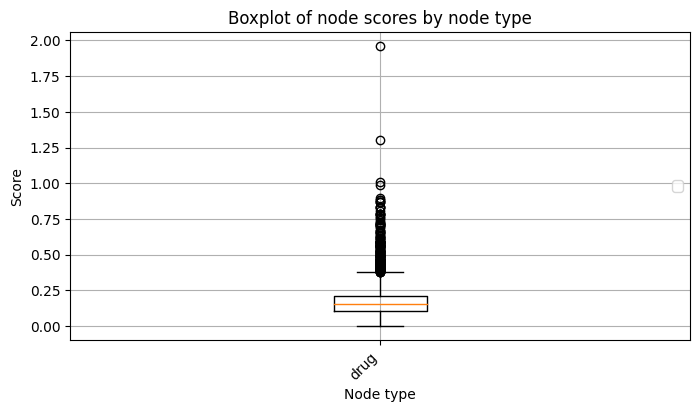

In [23]:
kg.plot_node_attribute_distribution(get_score, node_types=["drug"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


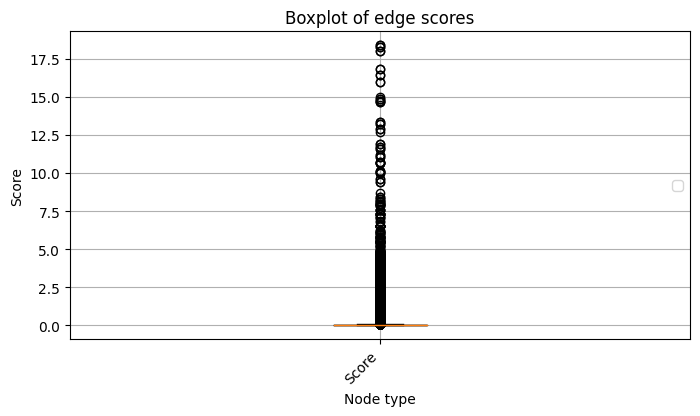

In [24]:
kg.plot_edge_attribute_distribution(edge_types=[("gene", "gene")], score_accessor=lambda x: x.get("score", 0))

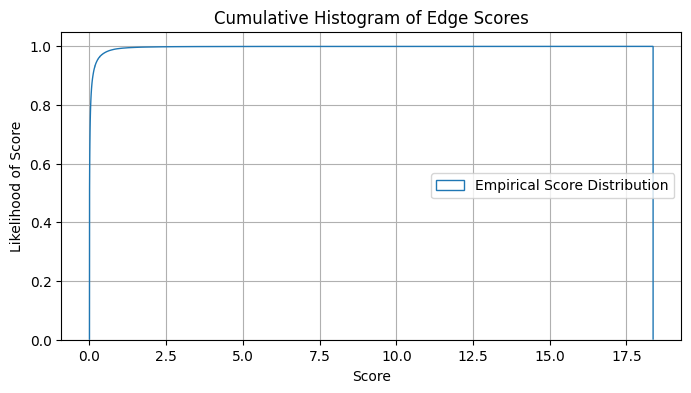

In [25]:
kg.plot_score_histogram(edge_types=[("gene", "gene")], score_accessor=lambda x: x.get("score", 0))

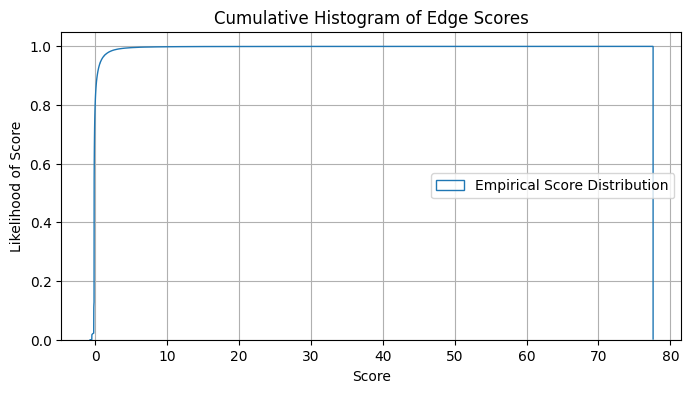

In [26]:
kg.plot_score_histogram(edge_types=[("gene", "gene")], score_accessor=lambda x: x.get("score_zscore", 0))

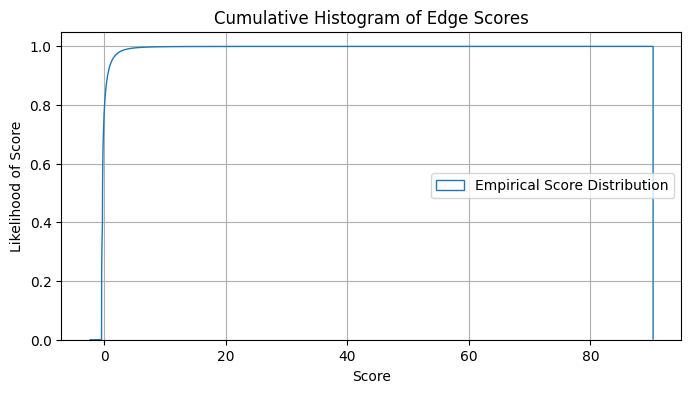

In [27]:
kg.plot_score_histogram(edge_types=[("gene", "geneset")], score_accessor=lambda x: x.get("score_zscore", 0))

In [28]:
kg

KGraph KGraph with 110407 nodes and 1573605 edges

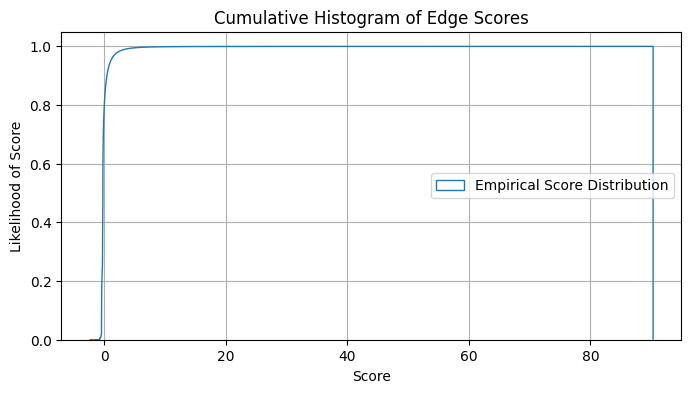

In [29]:
kg.plot_score_histogram(score_accessor=lambda x: x.get("score_zscore", 0))

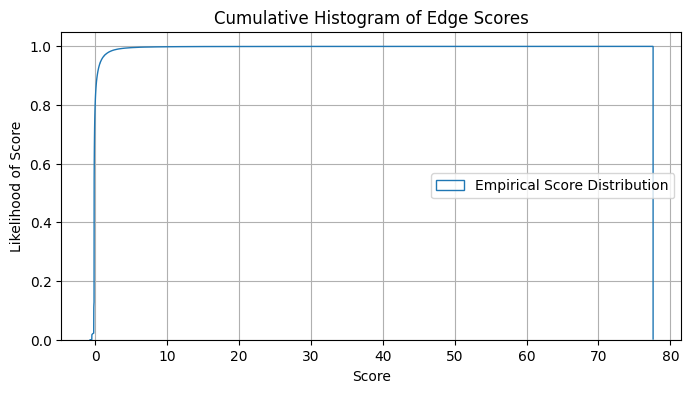

In [30]:
kg.plot_score_histogram(edge_types=[("gene", "gene")], score_accessor=lambda x: x.get("score_zscore", 0))

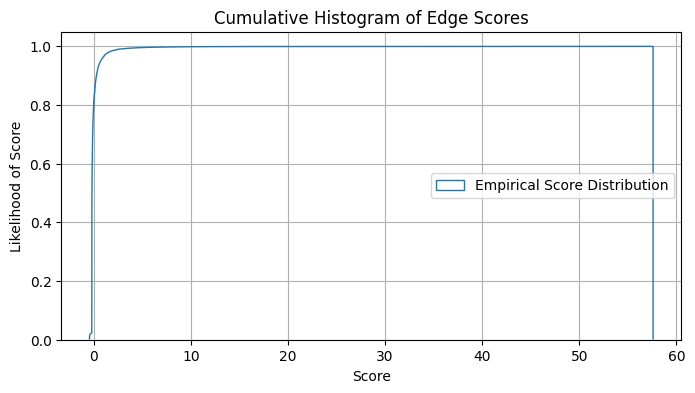

In [31]:
kg.plot_score_histogram(edge_types=[("gene", "disease")], score_accessor=lambda x: x.get("score_zscore", 0))

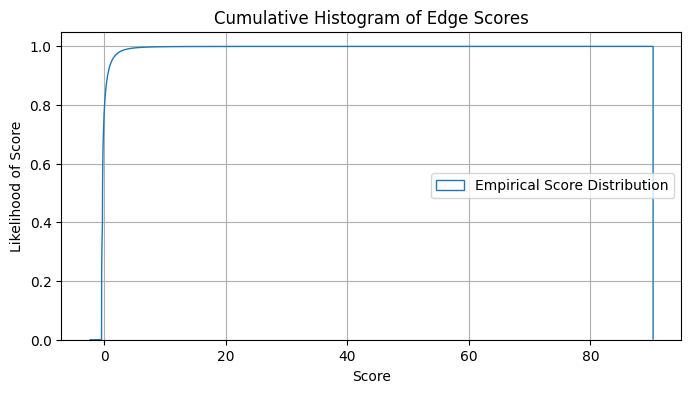

In [32]:
kg.plot_score_histogram(edge_types=[("gene", "geneset")], score_accessor=lambda x: x.get("score_zscore", 0))

Caution: if an edge's nodes have multiple node types, its score is attributed to the product of all node-types.
/mnt/raidbio/extproj/projekte/regulatory_networks/scripts/../mikg/kgraph.py:734: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


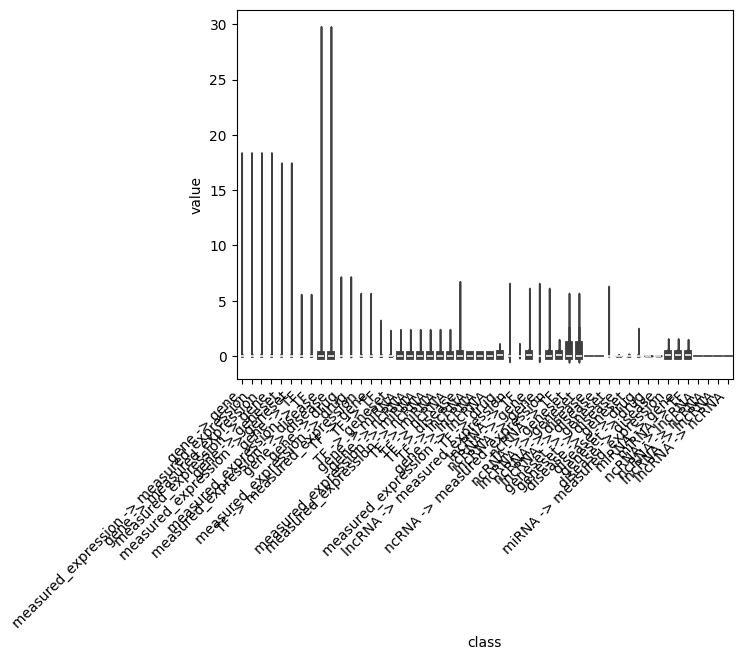

In [33]:
kg.plot_score_violin(per_edge_type=True, single_edge_types=True, score_accessor=lambda x: x.get("score", 0))

Caution: if an edge's nodes have multiple node types, its score is attributed to the product of all node-types.
/mnt/raidbio/extproj/projekte/regulatory_networks/scripts/../mikg/kgraph.py:734: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


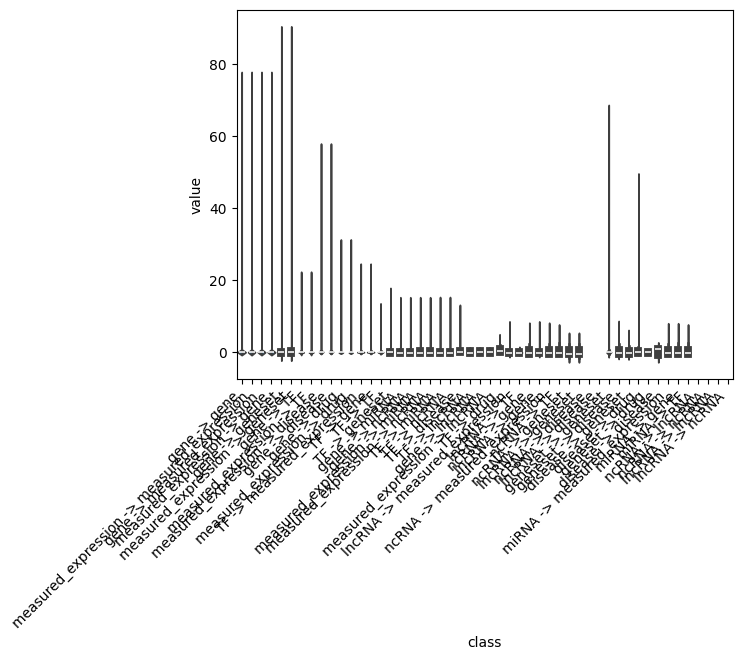

In [34]:
kg.plot_score_violin(per_edge_type=True, single_edge_types=True, score_accessor=lambda x: x.get("score_zscore", 0))

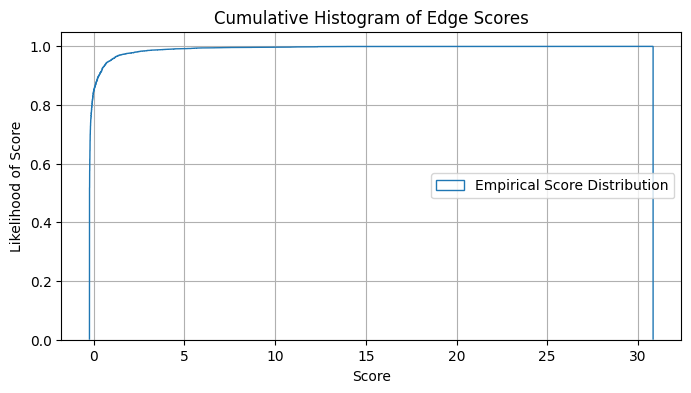

In [35]:
kg.plot_score_histogram(edge_types=[("gene", "drug")], score_accessor=lambda x: x.get("score_zscore", 0))

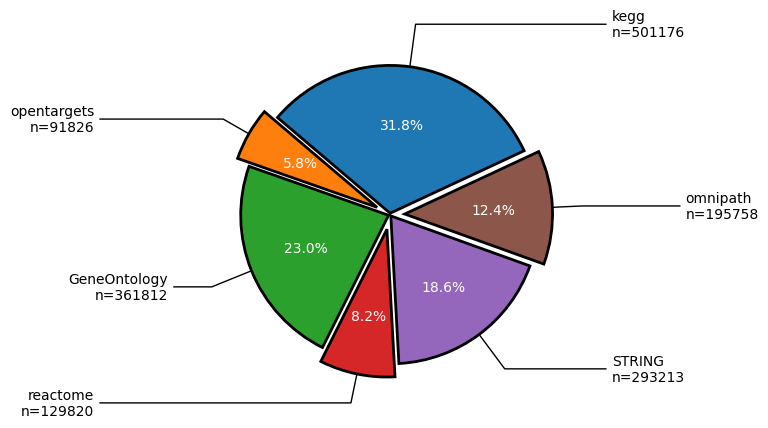

In [36]:
kg.plot_edge_sources()

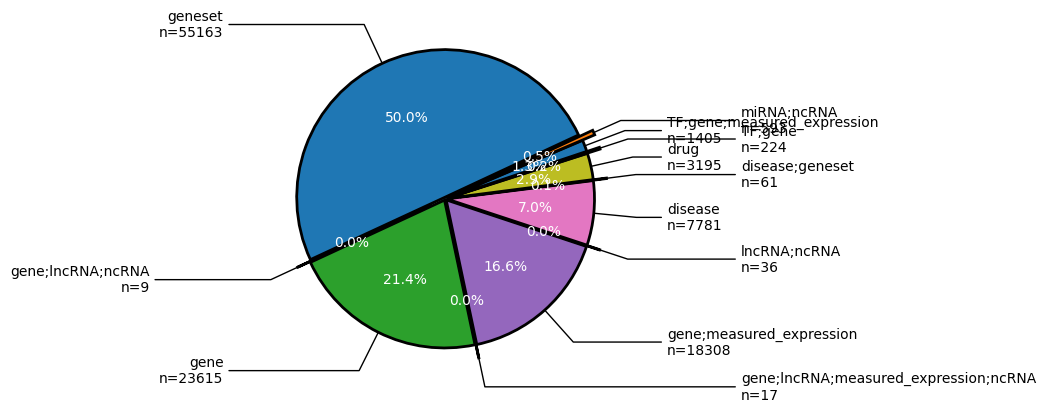

In [37]:
kg.plot_node_types()

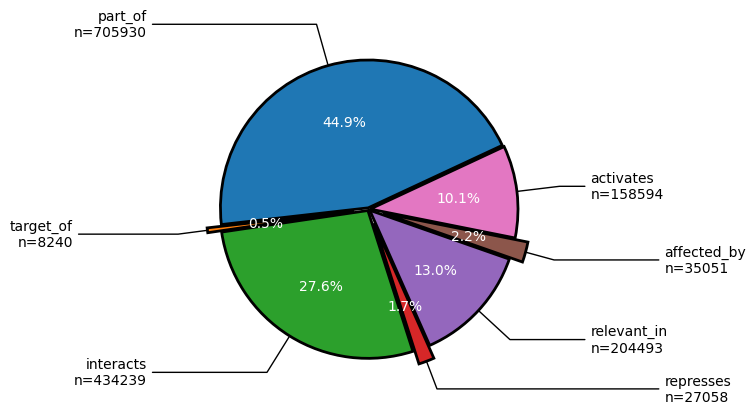

In [38]:
kg.plot_edge_types()

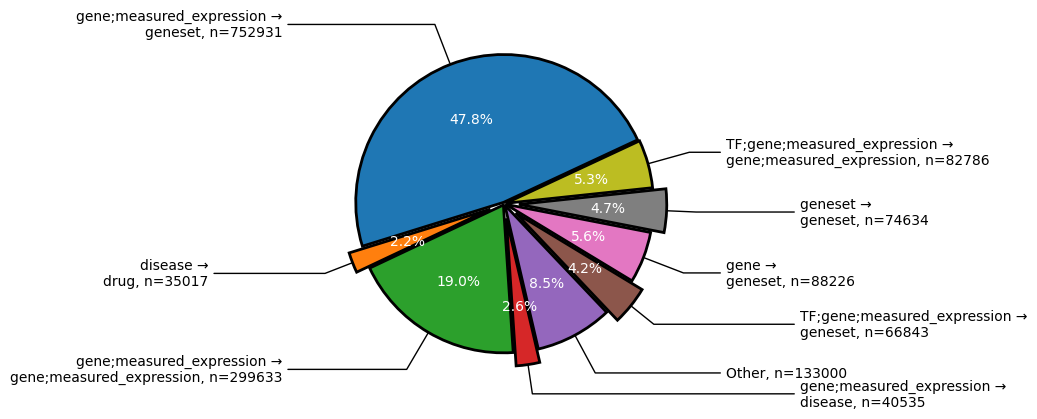

In [39]:
kg.plot_edge_between_types()

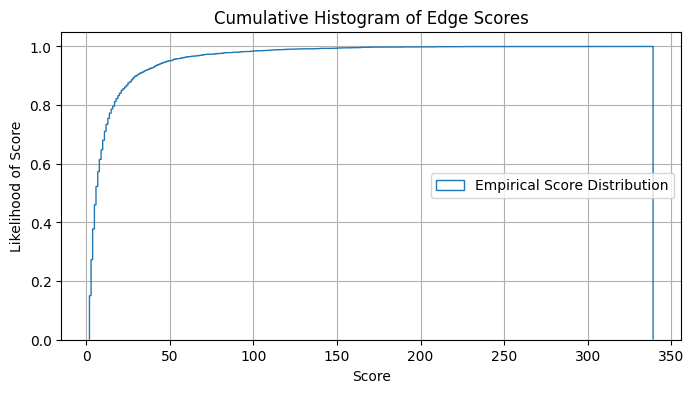

In [40]:
kg.plot_node_children("drug")

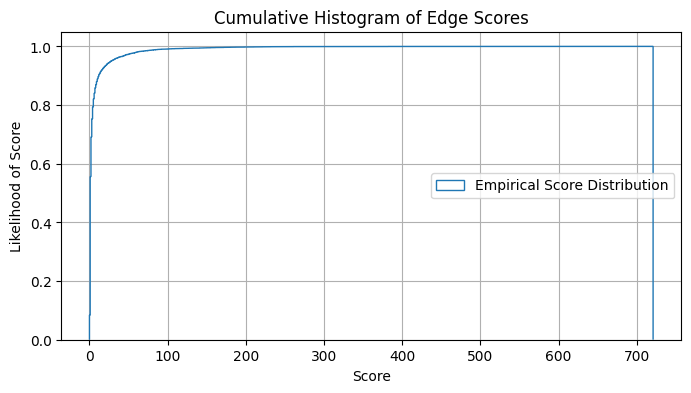

In [41]:
kg.plot_node_children("disease")

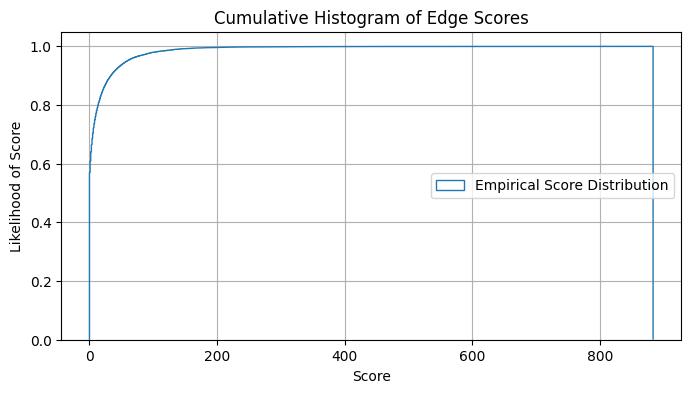

In [42]:
kg.plot_node_children("gene")